In [1]:
#%pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data

file_path = 'https://raw.githubusercontent.com/ayabongatshitshi-lab/Data-Science-Projects/refs/heads/main/MedData/medical_examination.csv'
df = pd.read_csv(file_path)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Category Plot. ..

In [3]:
# Add 'overweight' column

ow_list = []
for BMI in list( (df['weight']/( (df['height']/100) )**2).values ):
    if BMI > 25:
        ow = 1
    else:
        ow = 0
    ow_list.append(ow)

df['overweight'] = ow_list

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [4]:
# Normalize data by making 0 always good and 1 always bad.
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df = df.replace({ 'cholesterol':{1:0,2:1,3:1},
            'gluc':{1:0,2:1,3:1} })

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [6]:
# Create DataFrame for cat plot using `pd.melt` using just the values
# from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
# 'pd.melt() changes data from wide to long format. ..useful for handling categories

df_cat = pd.melt(df,id_vars = ['cardio'],
                 value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [7]:
# Group and reformat the data to split it by 'cardio'.
# Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.


## (rearrange the df_cat long-format -sort by cardio as the main cat, show me each variable, its value, and its count)
## group.by([]).size()

df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat = df_cat.rename(columns={0:'total'})
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


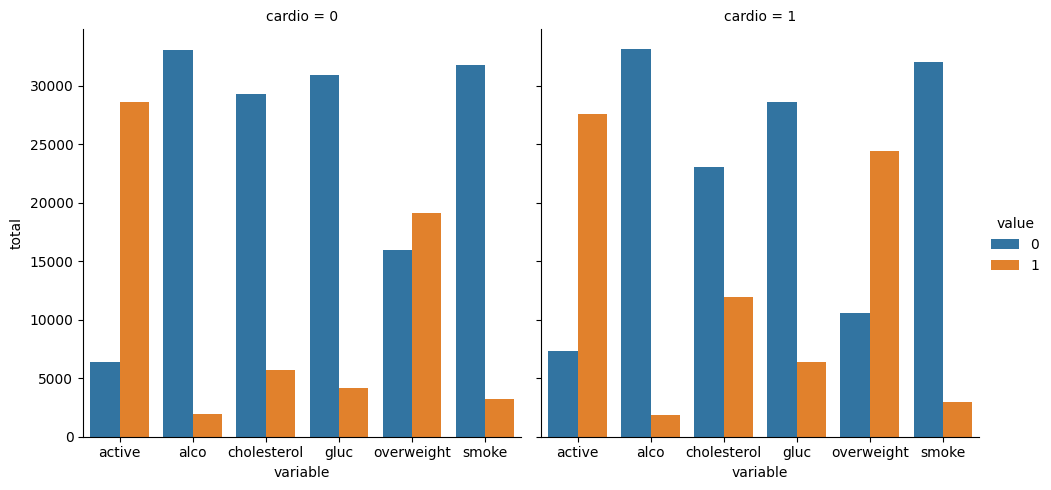

In [8]:
# Draw the catplot with 'sns.catplot()'

## hue - 'name' of variables in data (here each variable has a value (or "name') ot 1/0. ..
## row/col - plot the categories (here we have two categories: cardio 0 and 1) as columns or rows. ..

cat_graph = sns.catplot(data=df_cat, kind='bar', x='variable', y='total', col='cardio', hue='value')

# Get the figure for the output
fig = cat_graph.fig  ## -- save plot graph as a figure. ..

In [9]:
fig.savefig('MedFig1.png')



### Heat Map. ..


In [10]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [11]:
# Clean the data

df_heat = df[ (df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975)) ]

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [12]:
# Calculate the correlation matrix

## correlation matrix - table showing the relationship between two varibales:
## 1 (strong relationship), 0 (neutral relationship), -1 (not a strong relationship)
## notice -- should take shape of an ID matrix (where the same variables meet the corr coeff. should be 1)

corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [13]:
# Generate a mask for the upper triangle

## correlation matrix is reflective (values repeat on each side of the diagonal, as the variables meet twice on each side)
## about the diagonal. ..so wanna keep just the lower triangle for the heatmap, and avoid variables meeting twice
## np.triu - take upper triangle, np.ones_like - create matrix of 1's&0's with shape of spec array to use as bool for masking

mask = np.triu(np.ones_like(corr,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<Axes: >

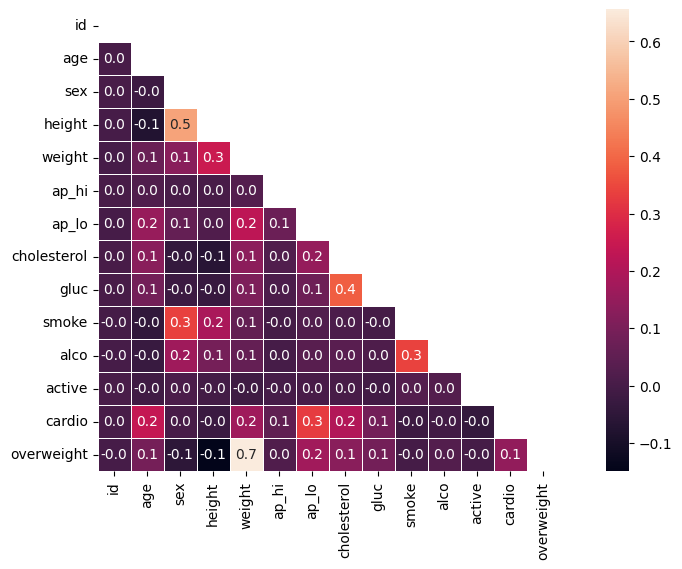

In [14]:
# Set up the matplotlib figure

fig, ax = plt.subplots(figsize=(12,6))

# Draw the heatmap with 'sns.heatmap()'

## square:use square cells for the plot, annot: if True, show data in cell, if False don't-based on the mask above(bool)
## fmt: call value format (.1),

sns.heatmap(data=corr, mask=mask, square=True, annot=True, linewidths=0.5, fmt='0.1f')

In [15]:
fig.savefig('MedFig2.png')